# 분류

## 1. Decision Tree

- from skearn.tree import DecisionTreeClassifier
- criterion(기본값 gini) : 불순도 지표
- max_depth (기본값 None) : 최대 한도 깊이
- min_samples_split (기본값 2) : 자식 노드를 갖기 위한 최소한의 데이터 수
- min_samples_leaf (기본값 1) : 리프 노드가 되기 위한 최소 샘플 수

In [1]:
# 데이터 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

def make_dataset():
    bc = load_breast_cancer()
    df = pd.DataFrame(bc.data, columns=bc.feature_names)
    df['target'] = bc.target
    
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.5, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((284, 30), (285, 30), (284,), (285,))

In [21]:
# Q. 의사결정나무의 하이퍼파라미터 값을 조절해 보세요. 
# 주피터 노트북에서 실습해 보세요.

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=0)

parameters = {"criterion":['entropy', 'gini'], 
              'max_depth' : [3, 5, 7, 10],
              'min_samples_split' : [2, 3, 5, 7],
              'min_samples_leaf' : [2, 3, 5, 7]
             }

clf = GridSearchCV(model,  parameters)
clf.fit(X_train, y_train)

clf.score(X_train, y_train)

0.9859154929577465

In [17]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 2}

In [18]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9263157894736842

## 2. Random Forest

- n_estimators : 트리의 수
- criterion(기본값 gini) : 불순도 지표
- max_depth (기본값 None) : 최대 한도 깊이
- min_samples_split (기본값 2) : 자식 노드를 갖기 위한 최소한의 데이터 수
- min_samples_lead (기본값 1) : 리프 노드가 되기 위한 최소 샘플 수

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=0)
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

0.9473684210526315

## 3. XGBoost
 - booster(기본값 gbtree): 부스팅 알고리즘 (또는 dart, gblinear)
 - objective(기본값 binary:logistic): 이진분류 (다중분류: multi:softmax)
 - max_depth(기본값 6): 최대 한도 깊이
 - learning_rate(기본값 0.1): 학습률
 - n_estimators(기본값 100): 트리의 수
 - subsample(기본값 1): 훈련 샘플 개수의 비율
 - colsample_bytree(기본값 1): 특성 개수의 비율
 - n_jobs(기본값 1): 사용 코어 수 (-1: 모든 코어를 다 사용)

In [23]:
# Q. xgboost의 하이퍼파라미터 값을 조절해 보세요. 
# 주피터 노트북에서 실습해 보세요. 
from xgboost import XGBClassifier
model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss',
                      booster = 'dart',
                      objective = 'binary:logistic',
                      max_depth = 10,
                      learning_rate = 0.05,
                      n_estimators = 500,
                      subsample = 1, 
                      colsample_bytree = 1,
                      n_jobs = -1
                      
                      
# xgboost 하이퍼파라미터
# - booster(기본값 gbtree): 부스팅 알고리즘 (또는 dart, gblinear)
# - objective(기본값 binary:logistic): 이진분류 (다중분류: multi:softmax)
# - max_depth(기본값 6): 최대 한도 깊이
# - learning_rate(기본값 0.1): 학습률
# - n_estimators(기본값 100): 트리의 수
# - subsample(기본값 1): 훈련 샘플 개수의 비율
# - colsample_bytree(기본값 1): 특성 개수의 비율
# - n_jobs(기본값 1): 사용 코어 수 (-1: 모든 코어를 다 사용)
                     )
model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy_score(y_test, pred)
#0.9649122807017544

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


0.9649122807017544

In [24]:
# 조기종료
model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss', 
                     learning_rate = 0.05,
                      n_estimators = 500)
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, eval_set=eval_set, early_stopping_rounds=10)
pred = model.predict(X_test)
accuracy_score(y_test, pred)

[0]	validation_0-logloss:0.65391
[1]	validation_0-logloss:0.61861
[2]	validation_0-logloss:0.58697
[3]	validation_0-logloss:0.55756
[4]	validation_0-logloss:0.53038
[5]	validation_0-logloss:0.50611
[6]	validation_0-logloss:0.48363
[7]	validation_0-logloss:0.46304
[8]	validation_0-logloss:0.44332
[9]	validation_0-logloss:0.42512
[10]	validation_0-logloss:0.40821
[11]	validation_0-logloss:0.39260
[12]	validation_0-logloss:0.37838
[13]	validation_0-logloss:0.36512
[14]	validation_0-logloss:0.35276
[15]	validation_0-logloss:0.34090
[16]	validation_0-logloss:0.33018
[17]	validation_0-logloss:0.31967
[18]	validation_0-logloss:0.30998
[19]	validation_0-logloss:0.30105
[20]	validation_0-logloss:0.29259
[21]	validation_0-logloss:0.28478
[22]	validation_0-logloss:0.27725
[23]	validation_0-logloss:0.27027
[24]	validation_0-logloss:0.26359
[25]	validation_0-logloss:0.25755
[26]	validation_0-logloss:0.25139
[27]	validation_0-logloss:0.24593
[28]	validation_0-logloss:0.24103
[29]	validation_0-loglos

0.9473684210526315

## 4. 교차검증

    1) KFold
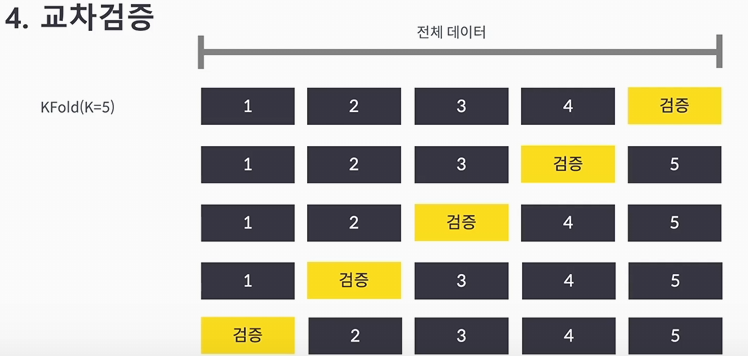

In [27]:
def make_dataset_Xy():
    bc = load_breast_cancer()
    df = pd.DataFrame(bc.data, columns=bc.feature_names)
    df['target'] = bc.target
    X = df.drop('target', axis=1)
    y = df['target']
    
    return X, y

In [29]:
from sklearn.model_selection import KFold

X, y = make_dataset_Xy()

model = DecisionTreeClassifier(random_state=0)
kfold = KFold(n_splits = 5)

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))

0.8771929824561403
0.9122807017543859
0.9473684210526315
0.9385964912280702
0.8407079646017699


    2) StratifiedKfold
    불균형한 target 비율을 가진 데이터가 한쪽으로 치우치는 것을 방지

In [31]:
from sklearn.model_selection import StratifiedKFold

X, y = make_dataset_Xy()

model = DecisionTreeClassifier(random_state=0)
kfold = StratifiedKFold(n_splits = 5)

for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))

0.9035087719298246
0.9210526315789473
0.9122807017543859
0.9473684210526315
0.9026548672566371


    3) Sklearn Cross Validation
       sklearn api를 활용하여 
       1. 학습 - fit()
       2. 예측 - predict()
       3. 평가 - evaluation()

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=3)
scores

array([0.88947368, 0.94210526, 0.86243386])

In [36]:
scores.mean()

0.8980042699340944

In [37]:
# 교차검증 StratifiedKFold
kfold = StratifiedKFold(n_splits = 5)
scores = cross_val_score(model, X, y, cv=kfold)
scores

array([0.90350877, 0.92105263, 0.9122807 , 0.94736842, 0.90265487])

In [38]:
scores.mean()

0.9173730787144851

## 5. 평가(분류)

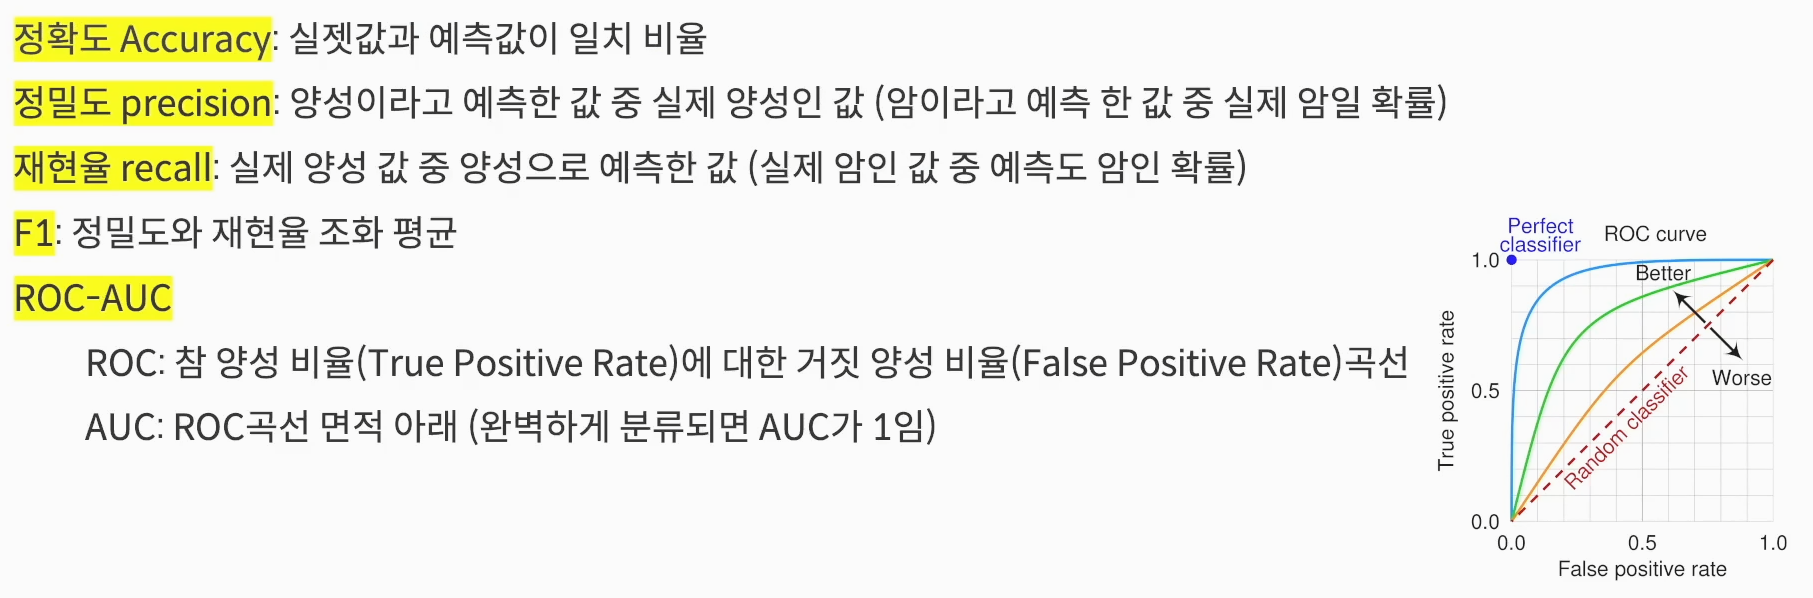

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred) # 정확도

0.9026548672566371

In [40]:
from sklearn.metrics import precision_score

precision_score(y_test, pred) # 정밀도

0.9545454545454546

In [41]:
from sklearn.metrics import recall_score

recall_score(y_test, pred) # 재현율

0.8873239436619719

In [43]:
from sklearn.metrics import f1_score

f1_score(y_test, pred) # F1 스코어

0.9197080291970803

In [45]:
# roc_auc
from sklearn.metrics import roc_auc_score

model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss', 
                     learning_rate = 0.05,
                      n_estimators = 500)
model.fit(X_train, y_train)
pred = model.predict_proba(X_test) # 결과를 확률값으로 받는 함수 (predict_proba)

roc_auc_score(y_test, pred[:,1])

0.9986586183769282

# 회귀

    1) 선형회귀

   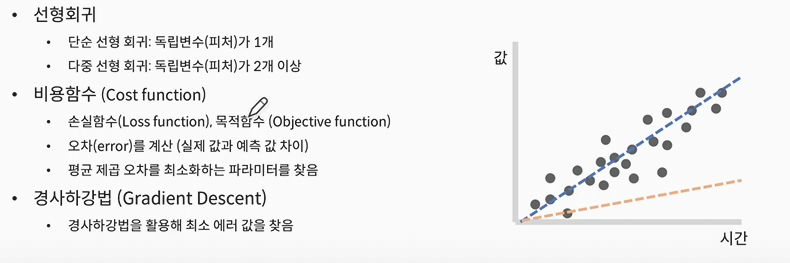

In [1]:
# 데이터 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes # 당뇨병 환자 데이터
def make_dataset():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop('target', axis=1), df['target'], test_size=0.2, random_state=1004)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = make_dataset()

In [2]:
# Q. 선형회귀 모델을 학습 및 예측을 하고 mean squared error 값을 도출해보세요.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2707.6236708320466

    2) 릿지 회귀
   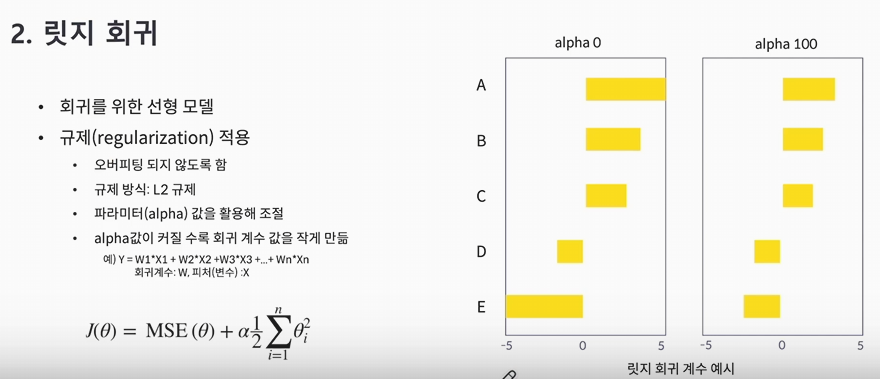

In [5]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1)
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3522.1129142470336

In [6]:
# 회귀계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,31.293287
sex,-71.449580
bmi,267.605153
bp,197.364745
s1,14.613106
s2,-13.884790
s3,-124.649955
s4,106.212968
s5,221.068052
s6,101.202651


In [7]:
# 릿지 회귀 (alpha = 10)
model = Ridge(alpha=10)
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

5521.882311176061

In [9]:
coef["alpha10"] = model.coef_
coef

,alpha1,alpha10
age,31.293287,16.703159
sex,-71.449580,-1.796452
bmi,267.605153,61.026348
bp,197.364745,47.435152
s1,14.613106,18.491225
s2,-13.884790,13.440080
s3,-124.649955,-35.542084
s4,106.212968,38.896129
s5,221.068052,55.276214
s6,101.202651,35.868345


In [13]:
# 릿지 회귀 (alpha = 0.1)
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2744.899739917671

In [14]:
coef["alpha0.1"] = model.coef_
coef

,alpha1,alpha10,alpha0.1
age,31.293287,16.703159,4.274486
sex,-71.449580,-1.796452,-205.214645
bmi,267.605153,61.026348,450.905500
bp,197.364745,47.435152,331.931307
s1,14.613106,18.491225,-84.310050
s2,-13.884790,13.440080,-54.665887
s3,-124.649955,-35.542084,-158.707920
s4,106.212968,38.896129,114.068214
s5,221.068052,55.276214,391.230355
s6,101.202651,35.868345,78.555719


In [15]:
# 릿지 회귀 (alpha = 0.05)
model = Ridge(alpha=0.05)
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2699.6575055293893

In [16]:
coef["alpha0.05"] = model.coef_
coef

,alpha1,alpha10,alpha0.1,alpha0.05
age,31.293287,16.703159,4.274486,-0.509655
sex,-71.449580,-1.796452,-205.214645,-223.350550
bmi,267.605153,61.026348,450.905500,469.442823
bp,197.364745,47.435152,331.931307,348.377551
s1,14.613106,18.491225,-84.310050,-146.949652
s2,-13.884790,13.440080,-54.665887,-18.302744
s3,-124.649955,-35.542084,-158.707920,-141.660642
s4,106.212968,38.896129,114.068214,115.862762
s5,221.068052,55.276214,391.230355,432.505816
s6,101.202651,35.868345,78.555719,69.579039


    3) 라쏘 회귀
   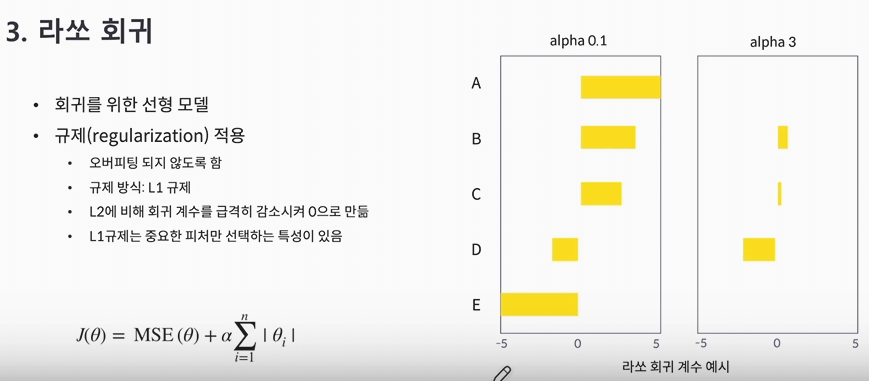

In [17]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=1)
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

4179.146884323723

In [18]:
# 회귀계수
coef = pd.DataFrame(data=model.coef_, index=X_train.columns, columns=['alpha1'])
coef

,alpha1
age,0.000000
sex,-0.000000
bmi,343.588370
bp,46.375388
s1,0.000000
s2,0.000000
s3,-0.000000
s4,0.000000
s5,245.167660
s6,0.000000


In [39]:
model = Lasso(alpha=2)
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6398.637179448666

In [40]:
# 회귀계수
coef["alpha2"] = model.coef_
coef

,alpha1,alpha2
age,0.000000,0.000000
sex,0.000000,0.000000
bmi,42.963888,42.963888
bp,0.000000,0.000000
s1,0.000000,0.000000
s2,0.000000,0.000000
s3,-0.000000,-0.000000
s4,0.000000,0.000000
s5,0.000000,0.000000
s6,0.000000,0.000000


In [41]:
model = Lasso(alpha=0.05)
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2703.4553190372917

In [42]:
# 회귀계수
coef["alpha0.05"] = model.coef_
coef

,alpha1,alpha2,alpha0.05
age,0.000000,0.000000,-0.000000
sex,0.000000,0.000000,-198.953867
bmi,42.963888,42.963888,487.192794
bp,0.000000,0.000000,340.499590
s1,0.000000,0.000000,-95.578630
s2,0.000000,0.000000,-0.000000
s3,-0.000000,-0.000000,-189.868586
s4,0.000000,0.000000,10.489156
s5,0.000000,0.000000,457.331482
s6,0.000000,0.000000,39.292945


In [28]:
alpha = [0.001, 0.01, 0.05, 0.1, 1, 10]
score = {}
for a in alpha:
    model = Lasso(alpha = a)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score[str(a)] = mean_squared_error(y_test, pred)

print(score)

{'0.001': 2701.7061476958074, '0.01': 2676.3844653651836, '0.05': 2703.4553190372917, '0.1': 2775.180919040914, '1': 4179.146884323723, '10': 6595.844885678807}


In [33]:
for k, i in score.items():
    print("{} : {}".format(k, i))

0.001 : 2701.7061476958074
0.01 : 2676.3844653651836
0.05 : 2703.4553190372917
0.1 : 2775.180919040914
1 : 4179.146884323723
10 : 6595.844885678807


    4) 엘라스틱넷 회귀
   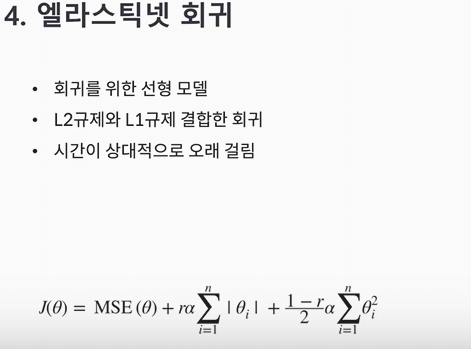

In [43]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

6539.270795233337

In [44]:
model = ElasticNet(alpha=0.0001, l1_ratio = 0.6)
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_squared_error(y_test, pred)

2675.6005929972935

    5) RandomForest

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

3250.2433966292133

    6) XGBoost

In [46]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)
mean_squared_error(y_test, pred)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


4028.2455020344587

In [47]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

model_r = RandomForestRegressor()
model_r.fit(X_train, y_train)
pred_r = model_r.predict(X_test) # [[YOUR CODE]])
print("랜덤포레스트")
print(mean_squared_error(y_test, pred_r))

model_x = XGBRegressor()
model_x.fit(X_train, y_train)
pred_x = model_x.predict(X_test)
print("xgboost")
print(mean_squared_error(y_test, pred_x))

랜덤포레스트
3268.6454134831456
xgboost
4028.2455020344587


### 하이퍼파라미터 튜닝

1) GridSearchCV

In [49]:
# 데이터 로드
def make_dataset2():
    dataset = load_diabetes()
    df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
    df['target'] = dataset.target
    return df.drop('target', axis=1), df['target']
X, y = make_dataset2()

In [50]:
params={'learning_rate':[0.07, 0.05], 
        'max_depth':[3, 5, 7], 
        'n_estimators':[100, 200],
        'subsample':[0.9, 0.8, 0.7]
        }

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

xgb = XGBRegressor()
grid = GridSearchCV(xgb, params, cv=3, n_jobs=-1)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [52]:
#최적의 하이퍼파라미터를 찾음
grid.best_params_

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}

In [54]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample = 0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3173.045180496539

2) RandomSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

xgb = XGBRegressor()
grid = RandomizedSearchCV(xgb, params, cv=3, n_iter=10, n_jobs=-1)
grid.fit(X, y)

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, reg_alpha=None,
                                       

In [56]:
grid.best_params_

{'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

In [57]:
# 하이퍼파라미터 튜닝
xgb = XGBRegressor(
    learning_rate = 0.05,
    max_depth = 3,
    n_estimators = 100,
    subsample = 0.7
)
xgb.fit(X_train, y_train)
pred = xgb.predict(X_test)
mean_squared_error(y_test, pred)

3173.045180496539

## 평가(회귀)

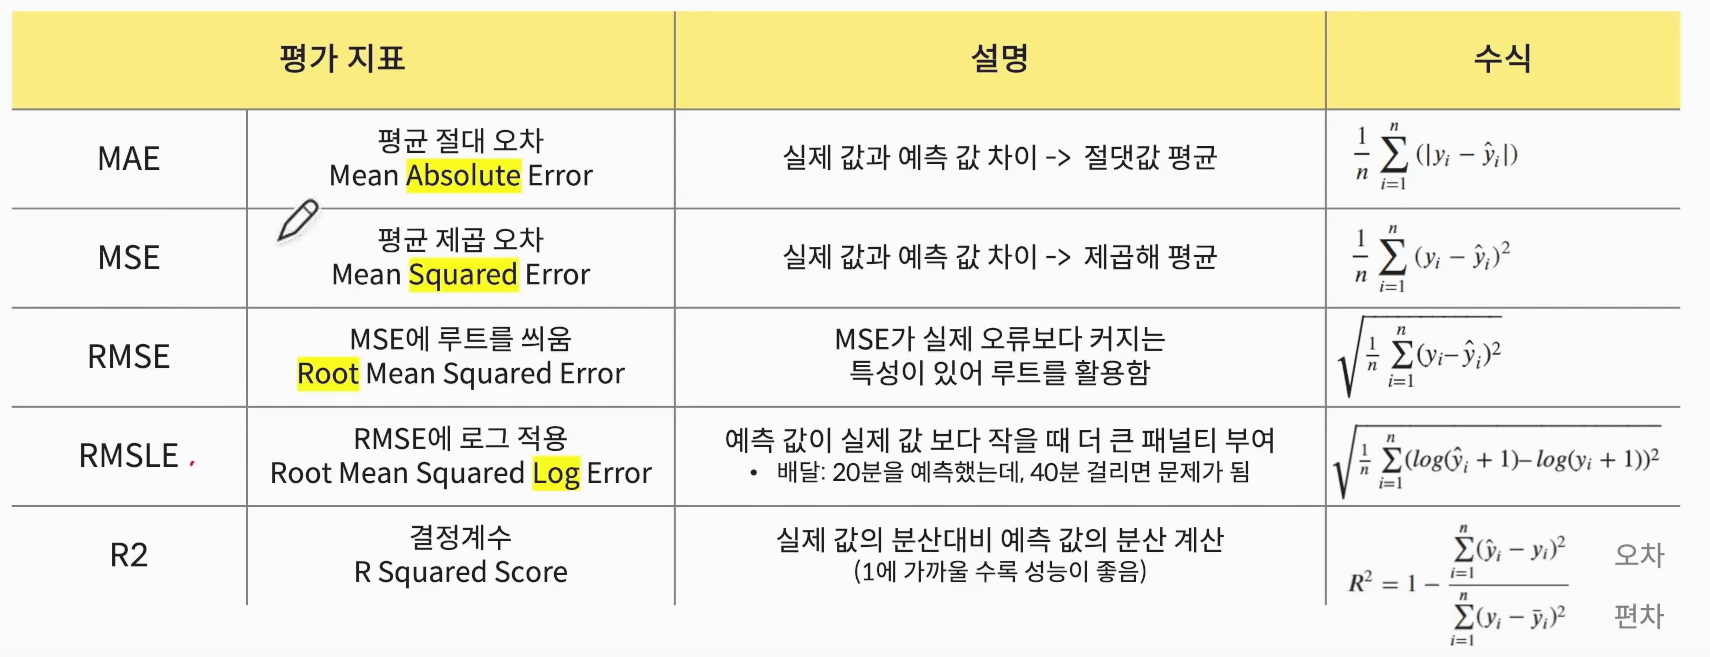

In [59]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

47.57186281011346

In [60]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

3173.045180496539

In [61]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test, pred))

56.32978945901129

In [64]:
#RMSLE
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error(y_test, pred))

0.4359462312673838

In [65]:
#RMSLE
np.sqrt(mean_squared_error(np.log(y_test + 1), np.log(pred + 1)))

0.4359462307342582

In [66]:
#R2
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.5153820583895429